In [1]:
import numpy as np
from vipm_image_retrieval import *
import pandas as pd
from PIL import Image
from IPython.display import display

In [2]:
name = pd.read_csv('../dataset/train_unlabeled.csv', header=None)
name

,0,1
0,train_059329.jpg,-1
1,train_059330.jpg,-1
2,train_059331.jpg,-1
3,train_059332.jpg,-1
4,train_059333.jpg,-1
...,...,...
113450,train_120210.jpg,-1
113451,train_120212.jpg,-1
113452,train_120213.jpg,-1
113453,train_120214.jpg,-1


In [3]:
dataset_small_training = np.load("../dataset/small_train_features_resnet50.npz")
dataset_training = np.load("../dataset/train_unlabeled_features_resnet50_completed.npz")



In [4]:
percent_20_random_features_unlabeled = np.random.choice(dataset_training['X'].shape[0], int(dataset_training['X'].shape[0]*0.2), replace=False)


In [5]:

retrival_best_fit = ImageRetrievalKNNCentroids(dataset=dataset_small_training['X'], 
                                               dataset_label=dataset_small_training['y'],
                                               queryset=dataset_training['X'], 
                                               n_image_per_class=10,
                                               algo='ball_tree')
indices_best_fit, predictions_best_fit = retrival_best_fit.retrive_images()

In [6]:
indices_best_fit[0:10]

[261, 101602, 39539, 84626, 21358, 100, 502, 152, 114, 464]

In [7]:
indices_best_fit[10:20]

[627, 634, 759, 724, 844, 92921, 84626, 862, 94837, 741]

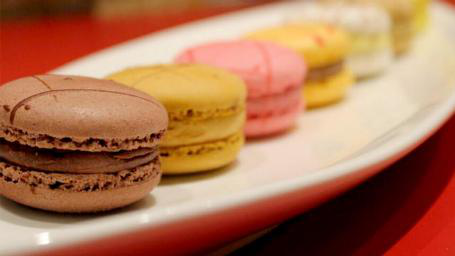

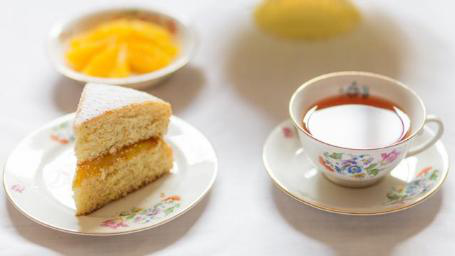

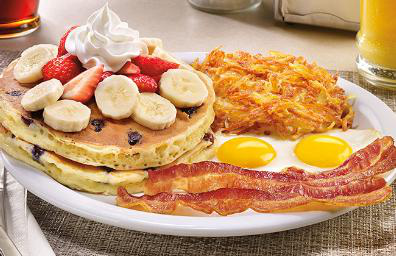

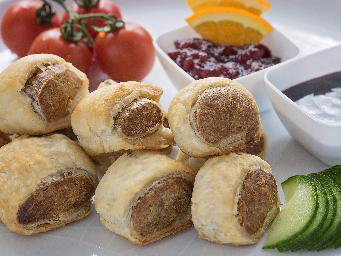

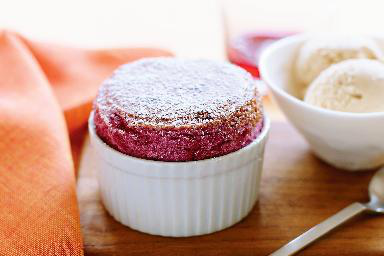

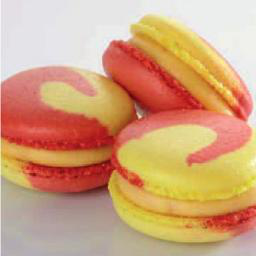

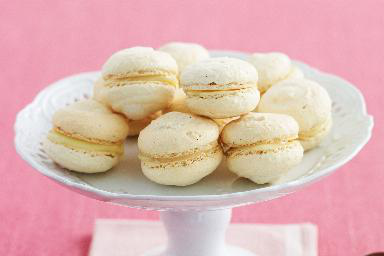

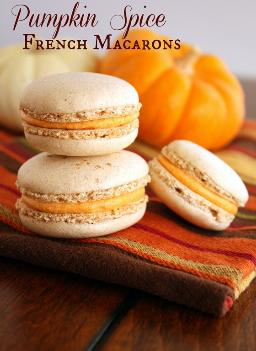

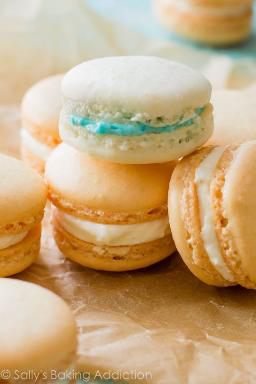

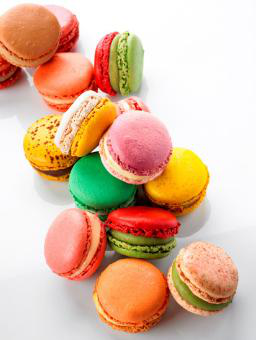

In [8]:
for name_file in name[0][indices_best_fit[0:10]]:
    display(Image.open(f'../dataset/train_set/{name_file}'))
    